In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x_train = np.loadtxt('files/train_X.csv', delimiter = ',').T
y_train = np.loadtxt('files/train_label.csv', delimiter = ',').T

x_test = np.loadtxt('files/test_X.csv', delimiter = ',').T
y_test = np.loadtxt('files/test_label.csv', delimiter = ',').T

In [3]:
print("shape of X_train :", x_train.shape)
print("shape of Y_train :", x_train.shape)
print("shape of X_test :", x_test.shape)
print("shape of Y_test :", x_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (784, 1000)
shape of X_test : (784, 350)
shape of Y_test : (784, 350)


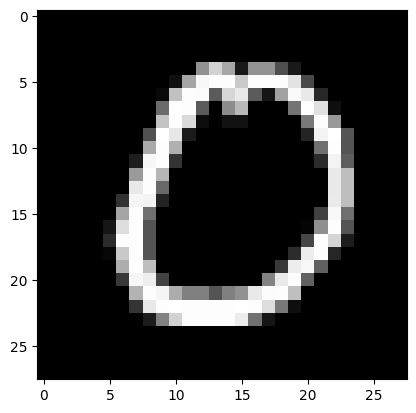

In [6]:
index = random.randrange(0, x_train.shape[1])
plt.imshow(x_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()

In [7]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)
    

In [8]:
# randomly generates the first parameters 

def initialize_parameters(nx, nh, ny):
    w1 = np.random.randn(nh, nx)*0.01  # generates the weights of each node of input_layer x hidden_layer
    b1 = np.zeros((nh,1))              # generates the biases of each neuron of the hidden_layer

    w2 = np.random.randn(ny, nh)*0.01  # generates the weights of each node of hidden_layer x output_layer
    b2 = np.zeros((ny,1))              # generates the biases of each neuron of the output layer

    parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }

    return parameters

In [9]:
# forward propogration function 

def forward_propagation(x, parameters): # takes in input and initial parameters 
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1 # calculates the values of the first neuron layer 
    a1 = relu(z1)           # activates the values with relu function
 
    z2 = np.dot(w2, a1) + b2 # calculates the values of the output layer 
    a2 = softmax(z2)         # activates the output layer with softmax function

    forward_cache = {
        'z1' : z1, 
        'a1' : a1,
        'z2' : z2,
        'a2' : a2
    }

    return forward_cache

In [10]:
# cost function
def cost_function(a2, y):  # takes in the output layer, and compares it to the label, and calculates the cost based on the values of the output neurons 
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

In [11]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)  # the output neuron values - values from y [0,0,0,0,1,0,0,0,0,0] for 5
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients


In [12]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [13]:
# the complete model

def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [24]:
iterations = 1000
n_h = 1000
learning_rate = 0.001
Parameters, Cost_list = model(x_train, y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 8.74183917599676
Cost after 100 iterations is : 0.056849698278876336
Cost after 200 iterations is : 0.019007085267523663
Cost after 300 iterations is : 0.012414201954084474
Cost after 400 iterations is : 0.009425974877485845
Cost after 500 iterations is : 0.007666015744825582
Cost after 600 iterations is : 0.006491968733460791
Cost after 700 iterations is : 0.005647412307146952
Cost after 800 iterations is : 0.005008002827999771
Cost after 900 iterations is : 0.004505608479476094


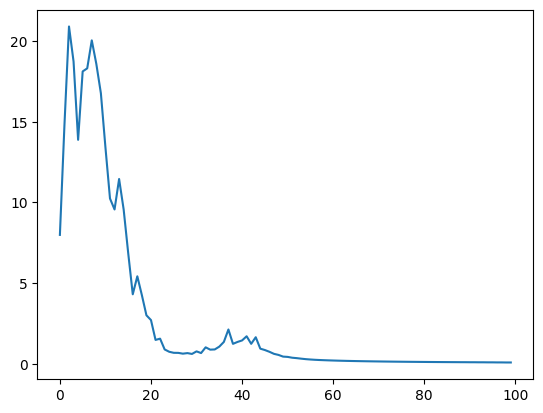

In [18]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [22]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [23]:
print("accuracy: ", accuracy(x_test, y_test, Parameters), "%")

accuracy:  86.85714285714286 %
